In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [3]:
# First we'll read in our data and look quickly at its contents
Auto = pd.read_csv('../data/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# Sometimes it's helpful to look at the list of columns
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [5]:
# What is the data type of each column?
Auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

# Reviewing the target variable

In [6]:
# Since we want to predict mpg, let's start by listing all its possible values
np.unique(Auto['mpg'])

array([ 9. , 10. , 11. , 12. , 13. , 14. , 14.5, 15. , 15.5, 16. , 16.2,
       16.5, 16.9, 17. , 17.5, 17.6, 17.7, 18. , 18.1, 18.2, 18.5, 18.6,
       19. , 19.1, 19.2, 19.4, 19.8, 19.9, 20. , 20.2, 20.3, 20.5, 20.6,
       20.8, 21. , 21.1, 21.5, 21.6, 22. , 22.3, 22.4, 22.5, 23. , 23.2,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.2, 24.3, 24.5, 25. , 25.1,
       25.4, 25.5, 25.8, 26. , 26.4, 26.5, 26.6, 26.8, 27. , 27.2, 27.4,
       27.5, 27.9, 28. , 28.1, 28.4, 28.8, 29. , 29.5, 29.8, 29.9, 30. ,
       30.5, 30.7, 30.9, 31. , 31.3, 31.5, 31.6, 31.8, 31.9, 32. , 32.1,
       32.2, 32.3, 32.4, 32.7, 32.8, 32.9, 33. , 33.5, 33.7, 33.8, 34. ,
       34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 35. , 35.1, 35.7, 36. , 36.1,
       36.4, 37. , 37.2, 37.3, 37.7, 38. , 38.1, 39. , 39.1, 39.4, 40.8,
       40.9, 41.5, 43.1, 43.4, 44. , 44.3, 44.6, 46.6])

In [7]:
# Are there any missing values in there?
# isnull() returns 1s for each NaN, then we can add them up to get the total count of missing values

Auto['mpg'].isnull().sum()

# CAUTION: This isn't foolproof! It won't find missing values that have been coded as 0, -1, 9999, etc.

0

In [8]:
# Let's create a function that allows us to display a histogram for a variable
# Credit to Hastie and Tibshirani--see their notes for more details on this

def histogram(var):
    n, bins, patches = plt.hist(x=var, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + var.name)

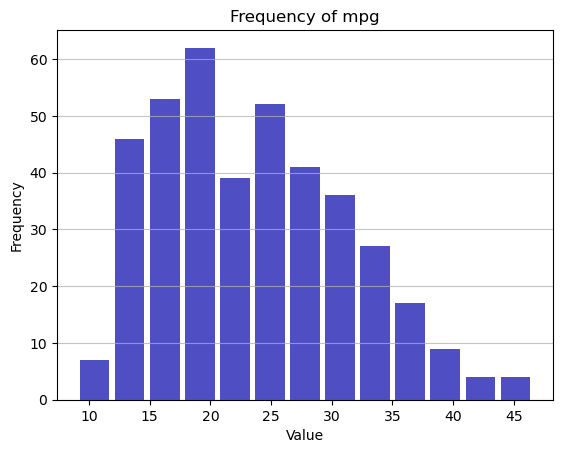

In [9]:
histogram(Auto['mpg'])

# Feature Engineering

## Working with missing values

In [10]:
np.unique(Auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [11]:
Auto[(Auto['horsepower']=='?')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [12]:
# Should we remove those records?
df_rem = Auto[(Auto['horsepower']!='?')]

In [13]:
# Or should we impute the mean value?

# Ok let's calculate the mean value first
int(pd.to_numeric(Auto['horsepower'], errors='coerce').mean())

104

In [14]:
# Now we'll impute the mean into the missing cells
df_imp = Auto
df_imp['horsepower'].replace('?','104',inplace=True)

np.unique(df_imp['horsepower'])

array(['100', '102', '103', '104', '105', '107', '108', '110', '112',
       '113', '115', '116', '120', '122', '125', '129', '130', '132',
       '133', '135', '137', '138', '139', '140', '142', '145', '148',
       '149', '150', '152', '153', '155', '158', '160', '165', '167',
       '170', '175', '180', '190', '193', '198', '200', '208', '210',
       '215', '220', '225', '230', '46', '48', '49', '52', '53', '54',
       '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92',
       '93', '94', '95', '96', '97', '98'], dtype=object)

In [15]:
# Convert the horsepower column to numeric

#df_rem['horsepower'] = pd.to_numeric(df_rem['horsepower'])

df_imp['horsepower'] = pd.to_numeric(df_imp['horsepower'])

## Numeric Variables & Visualization

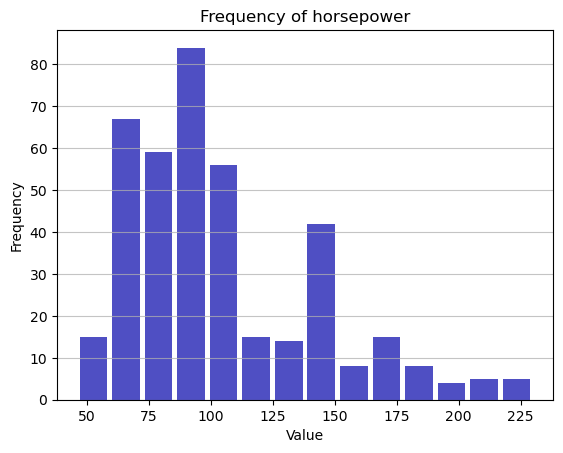

In [16]:
# Create a histogram for horsepower
histogram(df_imp['horsepower'])


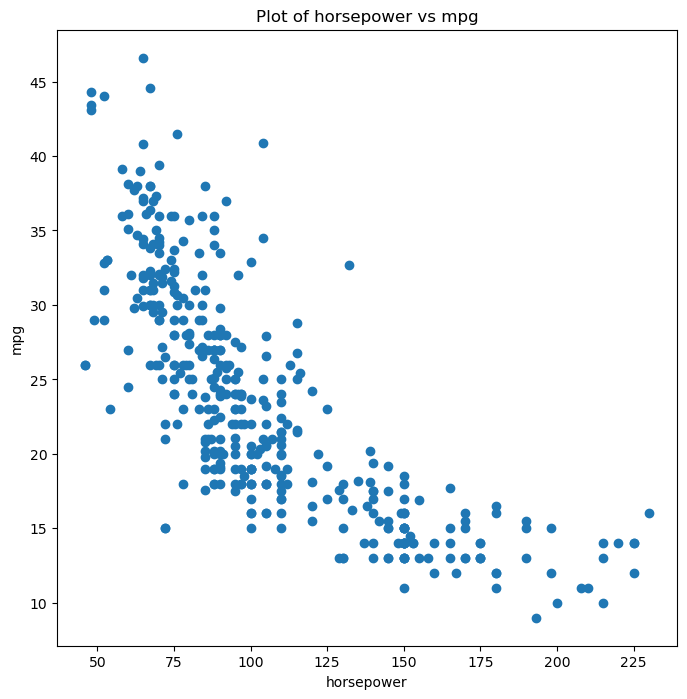

In [17]:
# Create a scatter plot (see Hastie and Tibshirani code)

from matplotlib.pyplot import subplots

def scatter(x,y):
    fig, ax = subplots(figsize=(8, 8))
    ax.scatter(x, y, marker='o')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.set_title('Plot of ' + x.name + ' vs ' + y.name);
    
scatter(df_imp['horsepower'], df_imp['mpg'])

In [18]:
# We can transform the horsepower variable so that the relationship is more linear

df_imp['hp_transform']=(225*np.ones(df_imp.shape[0])-df_imp['horsepower'])**2
df_imp['hp_transform']

0       9025.0
1       3600.0
2       5625.0
3       5625.0
4       7225.0
        ...   
392    19321.0
393    29929.0
394    19881.0
395    21316.0
396    20449.0
Name: hp_transform, Length: 397, dtype: float64

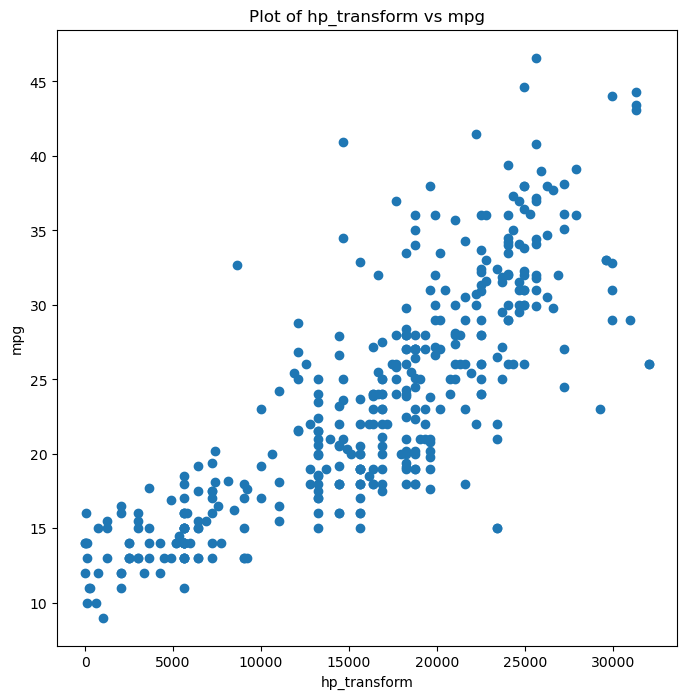

In [19]:
scatter(df_imp['hp_transform'], df_imp['mpg'])

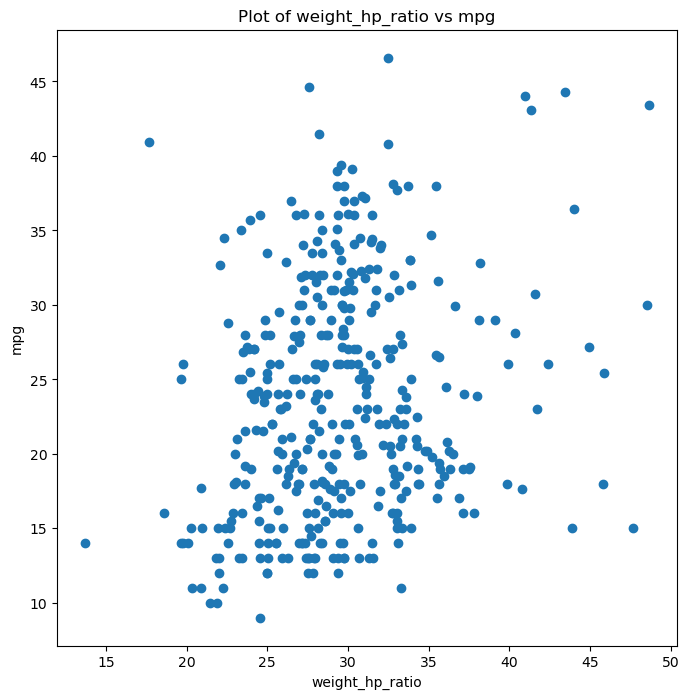

In [20]:
# We can also consider ratios of variables

df_imp['weight_hp_ratio'] = df_imp['weight']/df_imp['horsepower']
scatter(df_imp['weight_hp_ratio'], df_imp['mpg'])

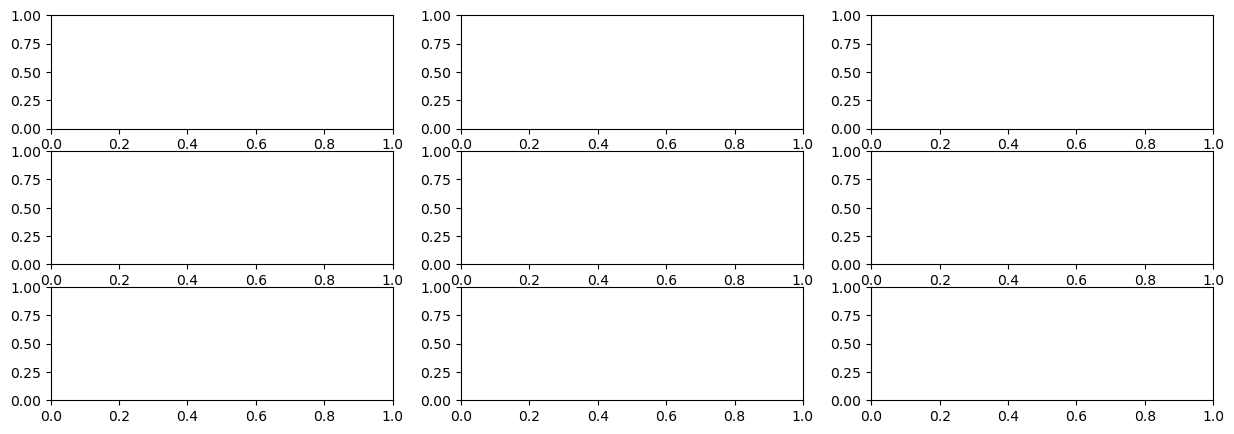

In [21]:
# Let's try creating a collection of plots

fig, axes = subplots(nrows=3,
                     ncols=3,
                     figsize=(15, 5))

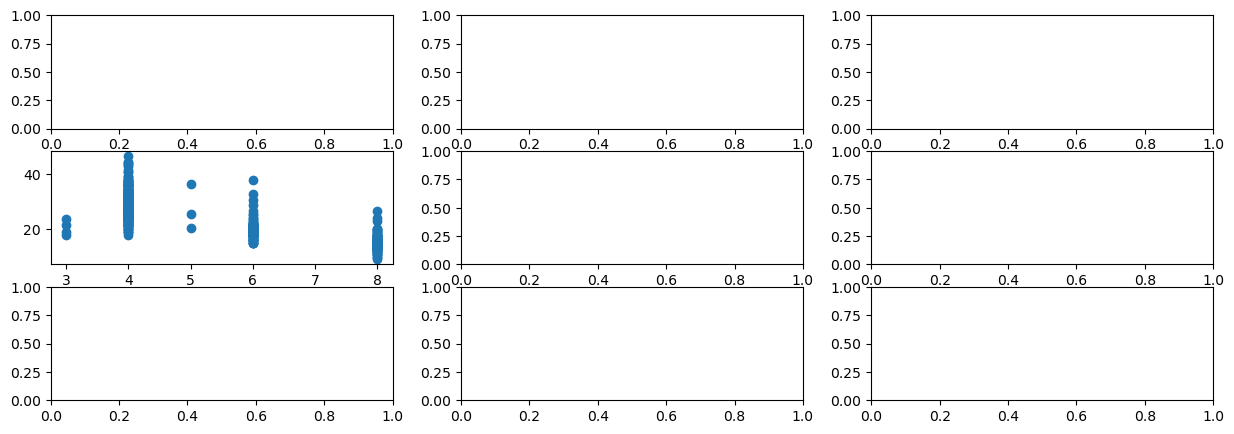

In [22]:
# We can put a scatter plot into one of the cells

axes[1,0].plot(df_imp['cylinders'], df_imp['mpg'], 'o')
fig

In [23]:
# Here is a quick helper function to map a list onto an NxN grid

def range_to_grid(i,Ncol):
    x=[]
    y=[]
    for n in range(Ncol**2):
        x.append(int(np.floor(n/Ncol)))
        y.append(n % Ncol)
        #print(n,x[n],y[n])
    return x[i],y[i]

In [24]:
# We'll create a subset of the columns that we want to plot

subset = df_imp[['cylinders','displacement','horsepower','weight','acceleration','year','origin','hp_transform','weight_hp_ratio']]

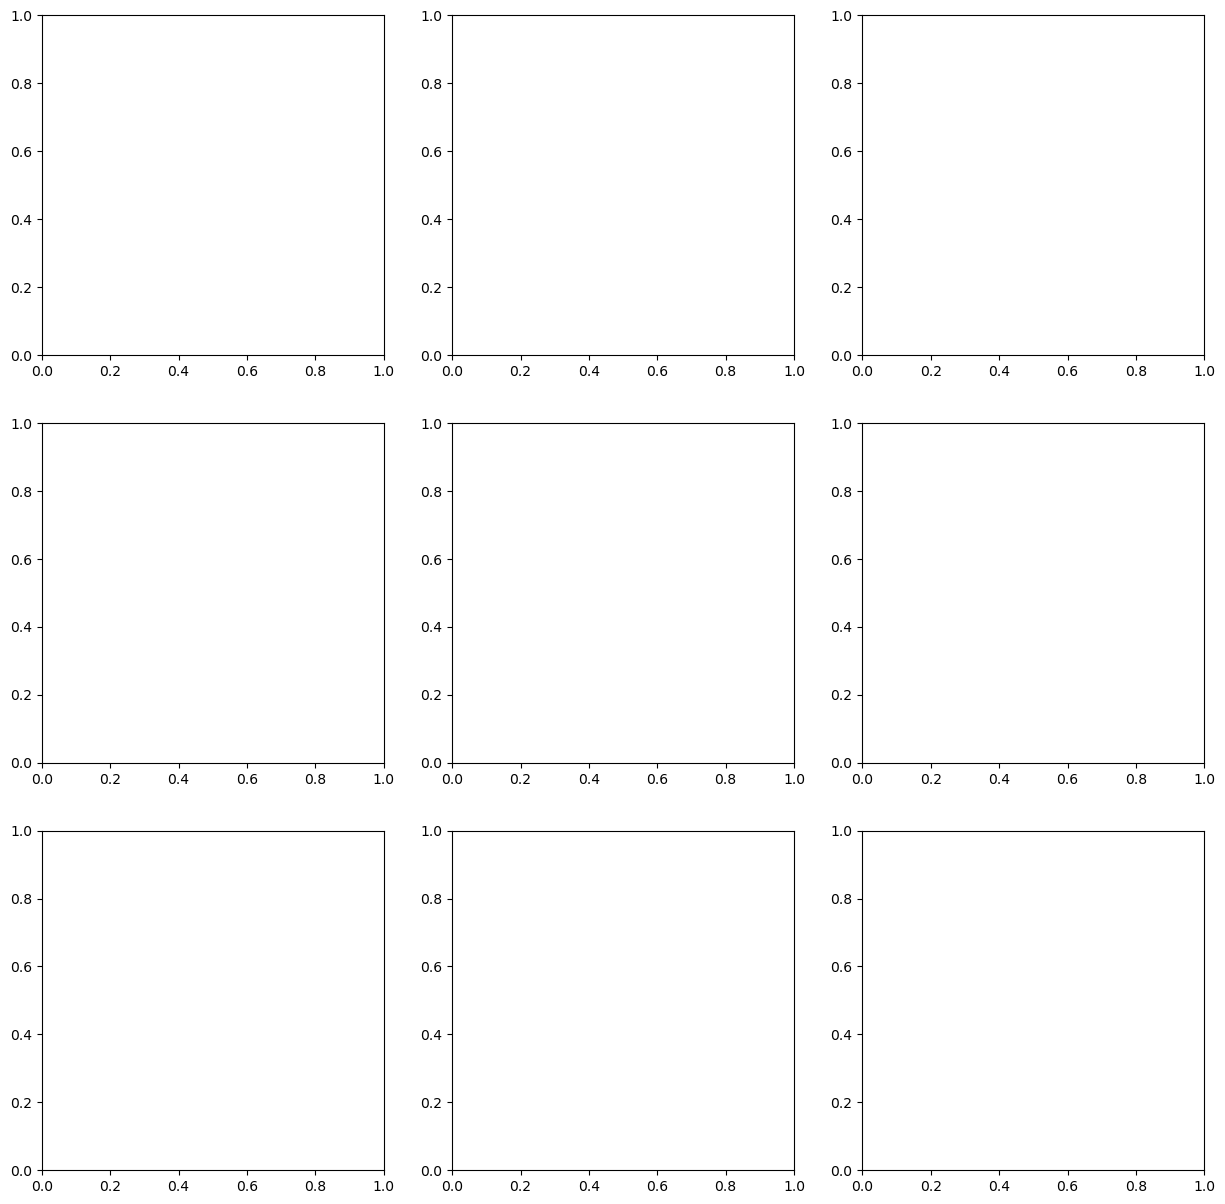

In [25]:
# Now we'll clear the existing plots before redrawing them

fig, axes = subplots(nrows=3,
                     ncols=3,
                     figsize=(15, 15))

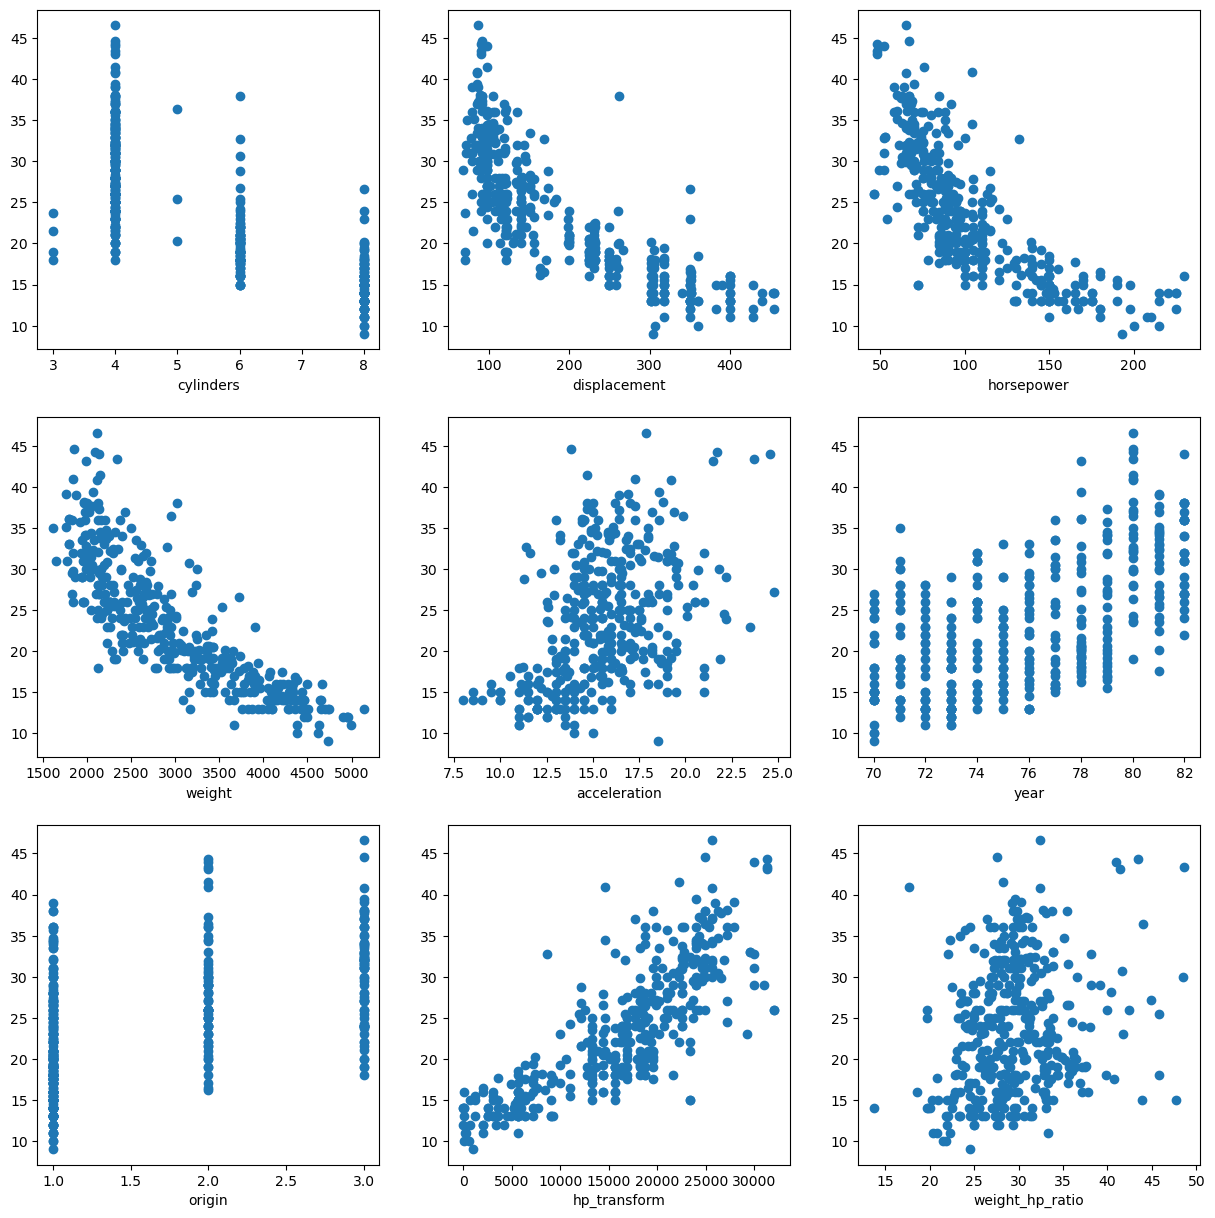

In [26]:
for j in range(len(subset.columns)):
    axes[range_to_grid(j,3)[0],range_to_grid(j,3)[1]].plot(subset.iloc[:,j], df_imp['mpg'], 'o')
    axes[range_to_grid(j,3)[0],range_to_grid(j,3)[1]].set_xlabel(subset.columns[j])
fig

In [27]:
# In addition to looking at plots, we should also consider whether variables are correlated with each other

subset.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,hp_transform,weight_hp_ratio
cylinders,1.000000,0.950920,0.839811,0.897017,-0.504061,-0.346717,-0.564972,-0.852213,-0.204832
displacement,0.950920,1.000000,0.893935,0.933104,-0.544162,-0.369804,-0.610664,-0.884711,-0.223740
horsepower,0.839811,0.893935,1.000000,0.860685,-0.687102,-0.413072,-0.453928,-0.973040,-0.544669
weight,0.897017,0.933104,0.860685,1.000000,-0.419502,-0.307900,-0.581265,-0.877958,-0.093376
acceleration,-0.504061,-0.544162,-0.687102,-0.419502,1.000000,0.282901,0.210084,0.690249,0.733779
year,-0.346717,-0.369804,-0.413072,-0.307900,0.282901,1.000000,0.184314,0.390291,0.295980
origin,-0.564972,-0.610664,-0.453928,-0.581265,0.210084,0.184314,1.000000,0.485286,-0.039254
hp_transform,-0.852213,-0.884711,-0.973040,-0.877958,0.690249,0.390291,0.485286,1.000000,0.538893
weight_hp_ratio,-0.204832,-0.223740,-0.544669,-0.093376,0.733779,0.295980,-0.039254,0.538893,1.000000


In [28]:
# We can add some color to this matrix so that correlated items more easily stand out

subset.corr().style.background_gradient(cmap='coolwarm')

,cylinders,displacement,horsepower,weight,acceleration,year,origin,hp_transform,weight_hp_ratio
cylinders,1.000000,0.950920,0.839811,0.897017,-0.504061,-0.346717,-0.564972,-0.852213,-0.204832
displacement,0.950920,1.000000,0.893935,0.933104,-0.544162,-0.369804,-0.610664,-0.884711,-0.223740
horsepower,0.839811,0.893935,1.000000,0.860685,-0.687102,-0.413072,-0.453928,-0.973040,-0.544669
weight,0.897017,0.933104,0.860685,1.000000,-0.419502,-0.307900,-0.581265,-0.877958,-0.093376
acceleration,-0.504061,-0.544162,-0.687102,-0.419502,1.000000,0.282901,0.210084,0.690249,0.733779
year,-0.346717,-0.369804,-0.413072,-0.307900,0.282901,1.000000,0.184314,0.390291,0.295980
origin,-0.564972,-0.610664,-0.453928,-0.581265,0.210084,0.184314,1.000000,0.485286,-0.039254
hp_transform,-0.852213,-0.884711,-0.973040,-0.877958,0.690249,0.390291,0.485286,1.000000,0.538893
weight_hp_ratio,-0.204832,-0.223740,-0.544669,-0.093376,0.733779,0.295980,-0.039254,0.538893,1.000000


## Categorical variables

In [29]:
# One potentially useful variable is the name of the vehicle

df_imp['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
392              ford mustang gl
393                    vw pickup
394                dodge rampage
395                  ford ranger
396                   chevy s-10
Name: name, Length: 397, dtype: object

In [30]:
# Let's grab just the first word in each vehicle name, which appears to be the "make"

df_imp['make'] = df_imp['name'].str.split(' ').str[0]

In [31]:
# Take a look at the possible values

df_imp['make'].value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: make, dtype: int64

In [32]:
# We can get an idea of how much mpg is associated with make by looking at the average mpg for each make

df_imp[['make','mpg']].groupby(by=['make']).mean()

,mpg
make,
amc,18.070370
audi,26.714286
bmw,23.750000
buick,19.182353
cadillac,19.750000
capri,25.000000
chevroelt,16.000000
chevrolet,20.472093
chevy,18.000000


In [33]:
# If we want to include this variable in our model, we might want to do one hot encoding

one_hot = pd.get_dummies(df_imp, columns = ['make']) 
one_hot

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp_transform,...,make_renault,make_saab,make_subaru,make_toyota,make_toyouta,make_triumph,make_vokswagen,make_volkswagen,make_volvo,make_vw
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,9025.0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,3600.0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,5625.0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,5625.0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7225.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,19321.0,...,0,0,0,0,0,0,0,0,0,0
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,29929.0,...,0,0,0,0,0,0,0,0,0,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,19881.0,...,0,0,0,0,0,0,0,0,0,0
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,21316.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# We can now look at a correlation matrix with these variables

one_hot[['mpg', 'weight', 'year', 'make_ford', 'make_toyota']].corr()

,mpg,weight,year,make_ford,make_toyota
mpg,1.000000,-0.831739,0.581469,-0.187728,0.161067
weight,-0.831739,1.000000,-0.307900,0.150043,-0.204829
year,0.581469,-0.307900,1.000000,-0.052585,0.036933
make_ford,-0.187728,0.150043,-0.052585,1.000000,-0.099528
make_toyota,0.161067,-0.204829,0.036933,-0.099528,1.000000


What if we consider the values of "make" as vectors of letters? Then we can compute a cosine distance between each pair of make names to decide if they are similar. 

Below is a nice block of code from a [Stack overflow answer](https://stackoverflow.com/questions/29484529/cosine-similarity-between-two-words-in-a-list):

In [35]:
def word2vec(word):
    from collections import Counter
    from math import sqrt

    # count the characters in word
    cw = Counter(word)
    # precomputes a set of the different characters
    sw = set(cw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))

    # return a tuple
    return cw, sw, lw

def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

In [36]:
# Let's test this out on a few examples.

a = 'ford'
b = 'toyota'
c = 'toyouta'

va = word2vec(a)
vb = word2vec(b)
vc = word2vec(c)

print(cosdis(va,vb))
print(cosdis(vb,vc))

0.31622776601683794
0.9534625892455922


In [37]:
# We'll take the list of make names from our data

make_list = np.unique(df_imp['make'])
make_list

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt',
       'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat',
       'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes',
       'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel',
       'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru',
       'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo',
       'vw'], dtype=object)

In [38]:
# Then we'll create a blank matrix where the rows and columns are make names,
# just like the correlation matrix from earlier.

cosine_matrix = pd.DataFrame(columns=make_list, index=make_list)
cosine_matrix

,amc,audi,bmw,buick,cadillac,capri,chevroelt,chevrolet,chevy,chrysler,...,renault,saab,subaru,toyota,toyouta,triumph,vokswagen,volkswagen,volvo,vw
amc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cadillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevroelt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chrysler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# For each entry in the matrix, we'll put the cosine similarity 

for i in range(len(make_list)):
    for j in range(len(make_list)):
        cosine_matrix.iloc[i,j]=float(cosdis(word2vec(make_list[i]),word2vec(make_list[j])))

cosine_matrix

,amc,audi,bmw,buick,cadillac,capri,chevroelt,chevrolet,chevy,chrysler,...,renault,saab,subaru,toyota,toyouta,triumph,vokswagen,volkswagen,volvo,vw
amc,1.0,0.288675,0.333333,0.258199,0.617213,0.516398,0.174078,0.174078,0.258199,0.182574,...,0.218218,0.471405,0.204124,0.182574,0.174078,0.218218,0.19245,0.182574,0.0,0.0
audi,0.288675,1.0,0.0,0.447214,0.534522,0.447214,0.0,0.0,0.0,0.0,...,0.377964,0.408248,0.53033,0.158114,0.301511,0.377964,0.166667,0.158114,0.0,0.0
bmw,0.333333,0.0,1.0,0.258199,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.235702,0.204124,0.0,0.0,0.218218,0.19245,0.182574,0.0,0.408248
buick,0.258199,0.447214,0.258199,1.0,0.358569,0.4,0.13484,0.13484,0.2,0.141421,...,0.169031,0.182574,0.474342,0.0,0.13484,0.338062,0.149071,0.141421,0.0,0.0
cadillac,0.617213,0.534522,0.0,0.358569,1.0,0.597614,0.322329,0.322329,0.239046,0.338062,...,0.404061,0.436436,0.188982,0.169031,0.161165,0.101015,0.178174,0.338062,0.178174,0.0
capri,0.516398,0.447214,0.0,0.4,0.597614,1.0,0.26968,0.26968,0.2,0.424264,...,0.338062,0.365148,0.316228,0.141421,0.13484,0.507093,0.149071,0.141421,0.0,0.0
chevroelt,0.174078,0.0,0.0,0.13484,0.322329,0.26968,1.0,1.0,0.6742,0.667424,...,0.569803,0.0,0.1066,0.381385,0.363636,0.341882,0.402015,0.476731,0.502519,0.213201
chevrolet,0.174078,0.0,0.0,0.13484,0.322329,0.26968,1.0,1.0,0.6742,0.667424,...,0.569803,0.0,0.1066,0.381385,0.363636,0.341882,0.402015,0.476731,0.502519,0.213201
chevy,0.258199,0.0,0.0,0.2,0.239046,0.2,0.6742,0.6742,1.0,0.565685,...,0.169031,0.0,0.0,0.141421,0.13484,0.169031,0.298142,0.282843,0.298142,0.316228
chrysler,0.182574,0.0,0.0,0.141421,0.338062,0.424264,0.667424,0.667424,0.565685,1.0,...,0.478091,0.129099,0.33541,0.1,0.095346,0.358569,0.210819,0.3,0.105409,0.0


In [40]:
# Let's see if we can make this more visually appealing...

cosine_matrix.astype('float').style.background_gradient(cmap='coolwarm')

,amc,audi,bmw,buick,cadillac,capri,chevroelt,chevrolet,chevy,chrysler,datsun,dodge,fiat,ford,hi,honda,maxda,mazda,mercedes,mercedes-benz,mercury,nissan,oldsmobile,opel,peugeot,plymouth,pontiac,renault,saab,subaru,toyota,toyouta,triumph,vokswagen,volkswagen,volvo,vw
amc,1.000000,0.288675,0.333333,0.258199,0.617213,0.516398,0.174078,0.174078,0.258199,0.182574,0.235702,0.000000,0.288675,0.000000,0.000000,0.258199,0.654654,0.654654,0.308607,0.230940,0.384900,0.182574,0.154303,0.000000,0.000000,0.204124,0.436436,0.218218,0.471405,0.204124,0.182574,0.174078,0.218218,0.192450,0.182574,0.000000,0.000000
audi,0.288675,1.000000,0.000000,0.447214,0.534522,0.447214,0.000000,0.000000,0.000000,0.000000,0.612372,0.377964,0.500000,0.250000,0.353553,0.447214,0.566947,0.566947,0.133631,0.100000,0.166667,0.316228,0.267261,0.000000,0.166667,0.176777,0.377964,0.377964,0.408248,0.530330,0.158114,0.301511,0.377964,0.166667,0.158114,0.000000,0.000000
bmw,0.333333,0.000000,1.000000,0.258199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218218,0.218218,0.154303,0.230940,0.192450,0.000000,0.308607,0.000000,0.000000,0.204124,0.000000,0.000000,0.235702,0.204124,0.000000,0.000000,0.218218,0.192450,0.182574,0.000000,0.408248
buick,0.258199,0.447214,0.258199,1.000000,0.358569,0.400000,0.134840,0.134840,0.200000,0.141421,0.182574,0.000000,0.223607,0.000000,0.316228,0.000000,0.000000,0.000000,0.119523,0.178885,0.298142,0.141421,0.239046,0.000000,0.149071,0.158114,0.338062,0.169031,0.182574,0.474342,0.000000,0.134840,0.338062,0.149071,0.141421,0.000000,0.000000
cadillac,0.617213,0.534522,0.000000,0.358569,1.000000,0.597614,0.322329,0.322329,0.239046,0.338062,0.327327,0.202031,0.400892,0.133631,0.188982,0.358569,0.505076,0.505076,0.214286,0.160357,0.178174,0.253546,0.428571,0.267261,0.000000,0.188982,0.505076,0.404061,0.436436,0.188982,0.169031,0.161165,0.101015,0.178174,0.338062,0.178174,0.000000
capri,0.516398,0.447214,0.000000,0.400000,0.597614,1.000000,0.269680,0.269680,0.200000,0.424264,0.182574,0.000000,0.447214,0.223607,0.316228,0.200000,0.338062,0.338062,0.239046,0.178885,0.447214,0.282843,0.119523,0.223607,0.149071,0.158114,0.676123,0.338062,0.365148,0.316228,0.141421,0.134840,0.507093,0.149071,0.141421,0.000000,0.000000
chevroelt,0.174078,0.000000,0.000000,0.134840,0.322329,0.269680,1.000000,1.000000,0.674200,0.667424,0.123091,0.341882,0.150756,0.301511,0.213201,0.269680,0.000000,0.000000,0.644658,0.603023,0.502519,0.000000,0.483494,0.603023,0.603023,0.426401,0.341882,0.569803,0.000000,0.106600,0.381385,0.363636,0.341882,0.402015,0.476731,0.502519,0.213201
chevrolet,0.174078,0.000000,0.000000,0.134840,0.322329,0.269680,1.000000,1.000000,0.674200,0.667424,0.123091,0.341882,0.150756,0.301511,0.213201,0.269680,0.000000,0.000000,0.644658,0.603023,0.502519,0.000000,0.483494,0.603023,0.603023,0.426401,0.341882,0.569803,0.000000,0.106600,0.381385,0.363636,0.341882,0.402015,0.476731,0.502519,0.213201
chevy,0.258199,0.000000,0.000000,0.200000,0.239046,0.200000,0.674200,0.674200,1.000000,0.565685,0.000000,0.169031,0.000000,0.000000,0.316228,0.200000,0.000000,0.000000,0.478091,0.447214,0.447214,0.000000,0.119523,0.223607,0.298142,0.316228,0.169031,0.169031,0.000000,0.000000,0.141421,0.134840,0.169031,0.298142,0.282843,0.298142,0.316228
chrysler,0.182574,0.000000,0.000000,0.141421,0.338062,0.424264,0.667424,0.667424,0.565685,1.000000,0.129099,0.119523,0.000000,0.316228,0.223607,0.141421,0.000000,0.000000,0.591608,0.505964,0.737865,0.200000,0.338062,0.316228,0.210819,0.335410,0.119523,0.478091,0.129099,0.335410,0.100000,0.095346,0.358569,0.210819,0.300000,0.105409,0.000000


In [43]:
# We can add a feature to create a list of pairs that look very similar.

similar_makes = []

for i in range(len(make_list)):
    for j in range(len(make_list)):
        cosine_matrix.iloc[i,j]=float(cosdis(word2vec(make_list[i]),word2vec(make_list[j])))
        #add the ordered pair to a list when cosdis is > .9
        if cosine_matrix.iloc[i,j] > 0.7 and make_list[i] != make_list[j]:
            similar_makes.append({make_list[i],make_list[j]})

similar_makes

[{'chevroelt', 'chevrolet'},
 {'chevroelt', 'chevrolet'},
 {'chrysler', 'mercury'},
 {'maxda', 'mazda'},
 {'maxda', 'mazda'},
 {'mercedes', 'mercedes-benz'},
 {'mercedes', 'mercedes-benz'},
 {'chrysler', 'mercury'},
 {'toyota', 'toyouta'},
 {'toyota', 'toyouta'},
 {'vokswagen', 'volkswagen'},
 {'vokswagen', 'volkswagen'}]